# Data Collection: Download Twitter Data using API

In [ ]:
# What keyword did you choose?:  coronavirus

In [1]:
import twitter
import tweepy
from tweepy import OAuthHandler
import json
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    
    CONSUMER_KEY = ''
    CONSUMER_SECRET =''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Collects all tweets that contain the keyword and stores them into a file
def search_for_keyword():
    api = oauth_login()
    query = 'coronavirus' # keyword
    count = 400
    lang = 'en'

    # Searches for tweets containing keyword using Search API
    results = api.search.tweets(q=query, count=count, lang=lang)
    statuses = results['statuses']
    
    # Write twitter data to a .json file    
    with open('data.json', 'w') as f:
        json.dump(statuses, f, indent=1)

search_for_keyword()


### Report  statistics about the tweets you collected 

In [ ]:
# The total number of tweets collected:  100

# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [2]:
import json
from collections import Counter
from prettytable import PrettyTable

# Load the tweets collected in the local file
def load_tweets():
    with open('data.json', 'r') as f:
        loaded_data = json.load(f)
    return loaded_data

# Compute the frequencies of the words being used in these tweets
def compute_and_plot_frequencies(data):
    status_texts = [ status['text'] 
                    for status in data ]

    # Make a list of words from the tweets
    words = []
    for t in status_texts:
        for w in t.split():
            words.append(w)

    # Find the top 30 frequent words and their frequencies    
    for item in [words]:
        c = Counter(item)
        print(c.most_common()[:30])
      
    # Plot a table of the top 30 most-frequent words with their counts
    for label, data in (('Word', words),):
        pt = PrettyTable(field_names=[label, 'Count'])
        c = Counter(data)
        [ pt.add_row(kv) for kv in c.most_common()[:30] ]
        pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
        print(pt)
            
compute_and_plot_frequencies(load_tweets())


[('RT', 89), ('the', 68), ('to', 54), ('of', 47), ('in', 25), ('a', 23), ('coronavirus', 23), ('for', 22), ('is', 18), ('with', 18), ('and', 17), ('from', 15), ('that', 13), ('Trump', 12), ('just', 11), ('Coronavirus', 10), ('on', 10), ('has', 9), ('he', 9), ('his', 9), ('are', 9), ('as', 8), ('because', 8), ('about', 7), ('you', 7), ('this', 7), ('--', 7), ('Dr.', 7), ('New', 7), ('The', 6)]
+-------------+-------+
| Word        | Count |
+-------------+-------+
| RT          |    89 |
| the         |    68 |
| to          |    54 |
| of          |    47 |
| in          |    25 |
| a           |    23 |
| coronavirus |    23 |
| for         |    22 |
| is          |    18 |
| with        |    18 |
| and         |    17 |
| from        |    15 |
| that        |    13 |
| Trump       |    12 |
| just        |    11 |
| Coronavirus |    10 |
| on          |    10 |
| has         |     9 |
| he          |     9 |
| his         |     9 |
| are         |     9 |
| as          |     8 |
| be

**(2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [3]:
from prettytable import PrettyTable

#  Plot a table of the top 10 most-retweeted tweets
def popular_retweets(data):
    
    # Tuple of variables going into table
    retweets = [
        (status['retweet_count'],
         status['text'])

        for status in data
            if 'retweeted_status' in status.keys()
    ]

    # Create table
    pt = PrettyTable(field_names=['Count', 'Text'])
    [ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
    pt.max_width['Text'] = 100
    pt.align= 'l'
    print(pt)
    
popular_retweets(load_tweets())


+-------+------------------------------------------------------------------------------------------------------+
| Count | Text                                                                                                 |
+-------+------------------------------------------------------------------------------------------------------+
| 33639 | RT @girlsreallyrule: Here is Captain Crozier walking away from his ship while sailors chant his name |
|       | after he was relieved from duty for bl…                                                              |
| 15130 | RT @nytimes: A landlord with 18 apartment buildings in New York City waived April rent for his 200   |
|       | to 300 tenants because of the coronaviru…                                                            |
| 15130 | RT @nytimes: A landlord with 18 apartment buildings in New York City waived April rent for his 200   |
|       | to 300 tenants because of the coronaviru…                                             

## **(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [4]:
from collections import Counter
from prettytable import PrettyTable

#  Plot of the top 10 most-frequent hashtags
def frequent_hashtags(data):
    hashtags = []
    for status in data:
        for hashtag in status['entities']['hashtags']:
            hashtags.append(hashtag['text'])
        
    for label, data in (('Hashtags', hashtags),):
            pt = PrettyTable(field_names=[label, 'Count'])
            c = Counter(data)
            [ pt.add_row(kv) for kv in c.most_common()[:10] ]
            pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
            print(pt)
    
frequent_hashtags(load_tweets())

# Plot of the top 10 most-mentioned users
def most_mentioned_users(data):
    screen_names = []
    for status in data:
        for user_mention in status['entities']['user_mentions']:
            screen_names.append(user_mention['screen_name'])
    
    for label, data in (('Users', screen_names),):
            pt = PrettyTable(field_names=[label, 'Count'])
            c = Counter(data)
            [ pt.add_row(kv) for kv in c.most_common()[:10] ]
            pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
            print(pt)

most_mentioned_users(load_tweets())


+-------------------+-------+
| Hashtags          | Count |
+-------------------+-------+
| coronavirus       |     3 |
| Coronavirus       |     2 |
| cannabiseducation |     1 |
| China             |     1 |
| BREAKING          |     1 |
| FoxNews           |     1 |
| Hannity           |     1 |
| COVID19           |     1 |
| FilmYourHospital  |     1 |
| ismail            |     1 |
+-------------------+-------+
+-----------------+-------+
| Users           | Count |
+-----------------+-------+
| RealCandaceO    |     5 |
| POTUS           |     4 |
| spectatorindex  |     4 |
| nytimes         |     4 |
| davidaxelrod    |     3 |
| funder          |     3 |
| realDonaldTrump |     2 |
| JStein_WaPo     |     2 |
| GovNedLamont    |     2 |
| CNNPolitics     |     2 |
+-----------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

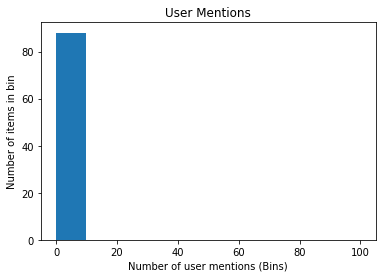

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

bins=[0, 10, 20, 30, 40, 50, 100]

# Histogram of number of user mentions
def create_histogram(data):
    screen_names = []
    for status in data:
        for user_mention in status['entities']['user_mentions']:
            screen_names.append(user_mention['screen_name'])
    
    for label, data in (('User Mentions', screen_names),):
        c = Counter(data) # counts frequncy of words
        plt.hist(c.values(), bins=bins) # plots each othe the values

        # Assigns labels for title, x-axis, and y-axis
        plt.title(label)
        plt.ylabel("Number of items in bin")
        plt.xlabel("Number of user mentions (Bins)")

        # Display histogram
        plt.figure()
    
create_histogram(load_tweets())
